In [8]:
# Import data and libraries
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
#from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
pd.options.display.mpl_style = 'default'
get_ipython().magic(u'matplotlib inline')
import sys 

sys.path.append('../Bmore/')
#import ibuttonplots
import importibuttondata
%matplotlib inline

files = glob.glob('/Users/annascott2/git/cityheat/Bham/data/olddata/*[tT].csv')
meta0  = pd.DataFrame(pd.read_csv('./data/birminghammeta_cleaned.csv', sep = ','))
tempDF0, meta0 = importibuttondata.importdata(files, meta0)

files = glob.glob('/Users/annascott2/git/cityheat/Bham/data/*[tT].csv')
#files = glob.glob('./data/*[tT].csv')
meta1 = pd.DataFrame(pd.read_csv('./data/birminghammeta_cleaned.csv', sep = ','))

#meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
tempDF1, meta1 = importibuttondata.importdata(files, meta1)

frames = [tempDF0, tempDF1]
tempDF = pd.concat(frames)
anomalyDF = pd.concat([anomalyDF0, anomalyDF1])
meta = pd.concat([meta0, meta1.loc()[np.setdiff1d(meta1.sensornumber, meta0.sensornumber)]])

TypeError: cannot concatenate a non-NDFrame object

In [27]:
tempDF1.resample('D').mean()['2015-06-30':'2015-09-20'].to_csv('ALmeandaily2015temp.csv')

/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


In [32]:
meta1.loc[tempDF1.columns][['location:Latitude', 'location:Longitude']].to_csv('AL2015locations.csv')

/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


In [37]:
tempDF1['Latitude'] = meta1.loc[tempDF1.columns][['location:Latitude']].T

/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


ValueError: cannot set items on DatetimeIndexResampler

In [26]:
reload(ibuttonplots)

<module 'ibuttonplots' from '../Bmore/ibuttonplots.py'>

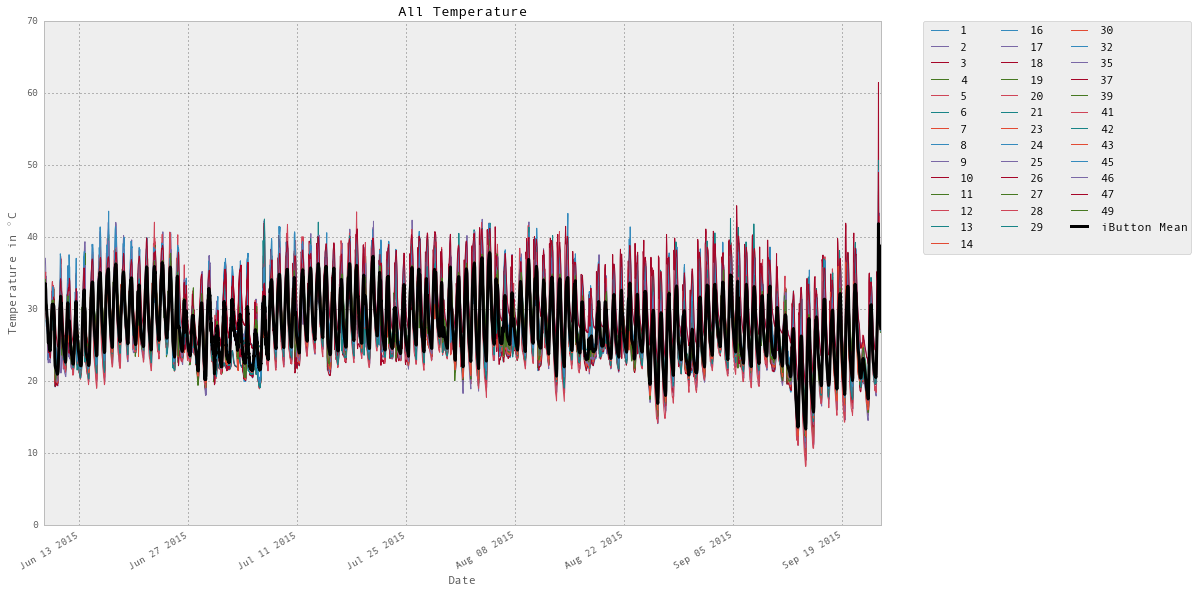

In [10]:
fig = plt.figure(figsize=[15,10])
for column in tempDF: 
    plt.plot(tempDF.index, tempDF[column], label= column)

tempDF.mean(axis=1).plot(style = 'k', label = 'iButton Mean', linewidth = 3)
#observations.urban.plot(style = 'or', label = 'Sci. Center', linewidth = 3, markersize = 8)
#observations.rural.plot(style = 'ob', label = 'BWI', linewidth = 3, markersize = 8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)
plt.title('All Temperature')
plt.ylabel('Temperature in $^\circ $C')

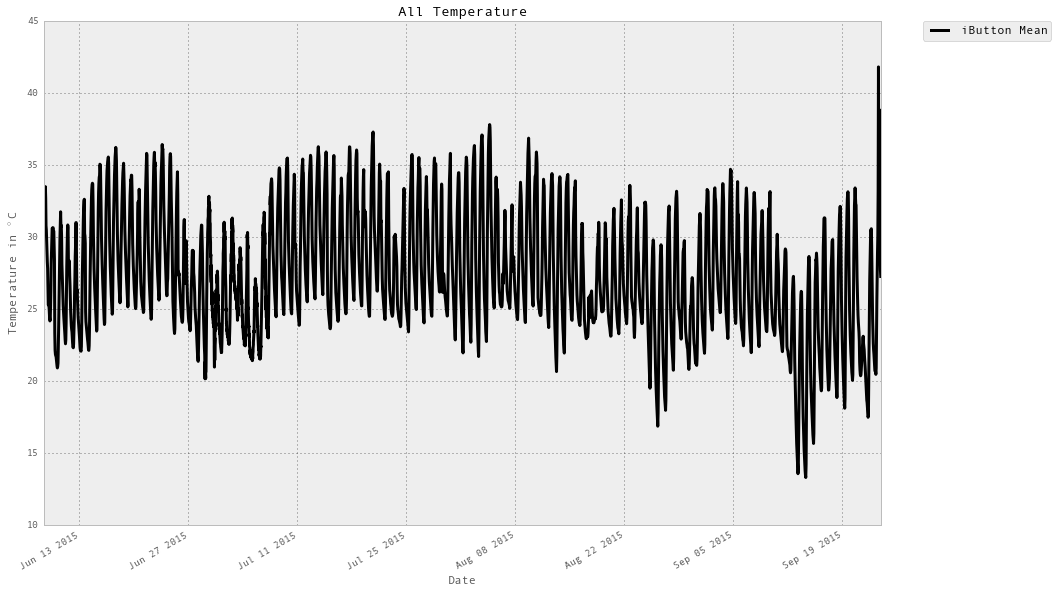

In [11]:
fig = plt.figure(figsize=[15,10])
tempDF.mean(axis=1).plot(style = 'k', label = 'iButton Mean', linewidth = 3)
#observations.urban.plot(style = 'or', label = 'Sci. Center', linewidth = 3, markersize = 8)
#observations.rural.plot(style = 'ob', label = 'BWI', linewidth = 3, markersize = 8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.title('All Temperature')
plt.ylabel('Temperature in $^\circ $C')

In [12]:
tempDF.mean(axis=1)['2015-08-5'].mean(), tempDF.mean(axis=1)['2015-09-21'].mean()

(29.212507352941177, 21.97283578431373)

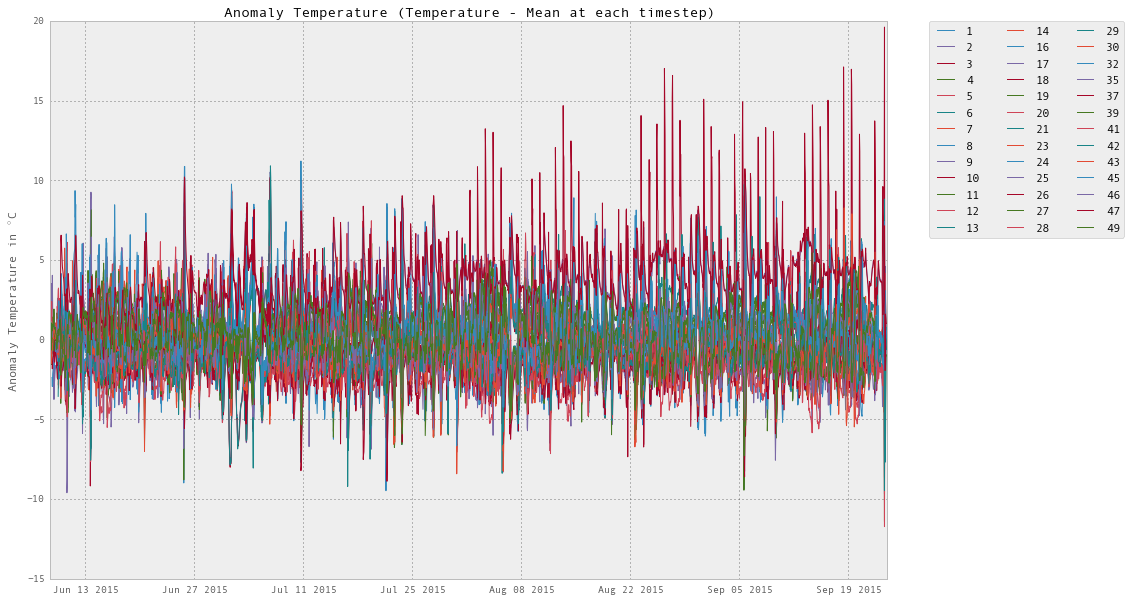

In [13]:
# plot anomaly 
fig = plt.figure(figsize=[15,10])
for column in tempDF: 
    plt.plot(anomalyDF.index, anomalyDF[column], label= column)
#anomalyDF.std(axis=1).plot(style = 'black', alpha = .5, linewidth = 3, label = '+$sigma$')
#(anomalyDF.std(axis=1)*-1).plot(style = 'black', alpha = .5, linewidth = 3, label = '- $\sigma$')
#observations.urban.subtract(observations.rural).plot(style = 'or', label = 'U-R', markersize = 8)

plt.title('Anomaly Temperature (Temperature - Mean at each timestep)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)
plt.ylabel('Anomaly Temperature in $^\circ $C')

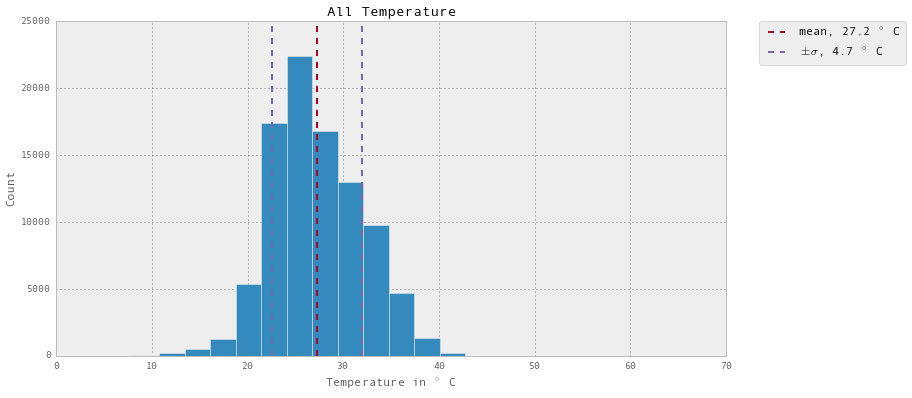

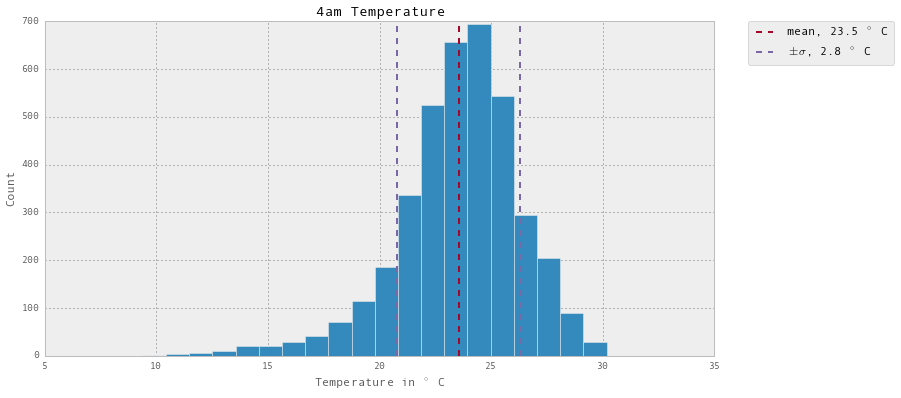

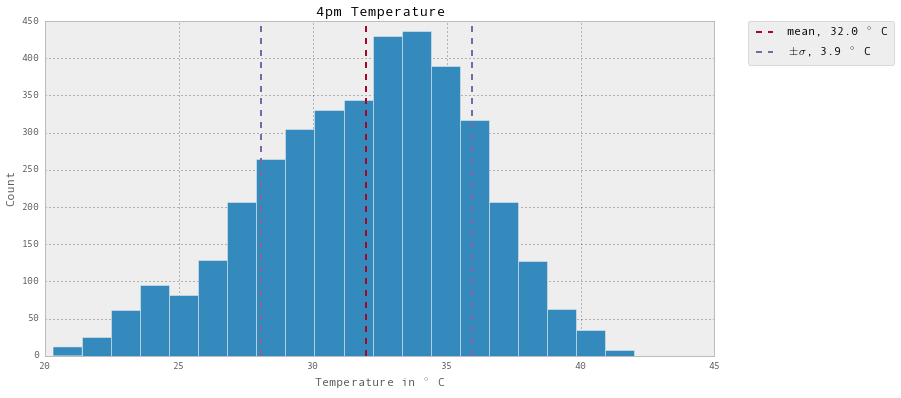

In [14]:
ibuttonplots.histPlot(tempDF, 'All Temperature')
h1, bins1 = ibuttonplots.histPlot(tempDF[tempDF.index.hour == 4], '4am Temperature')
h2, bins2 = ibuttonplots.histPlot(tempDF[tempDF.index.hour == 16], '4pm Temperature')

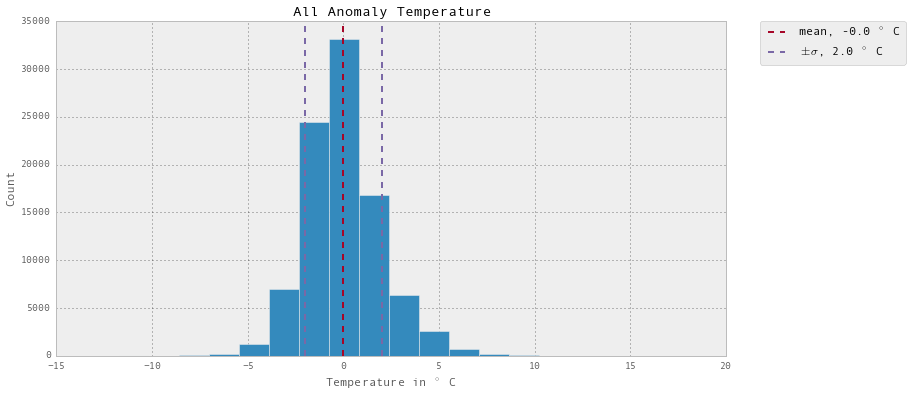

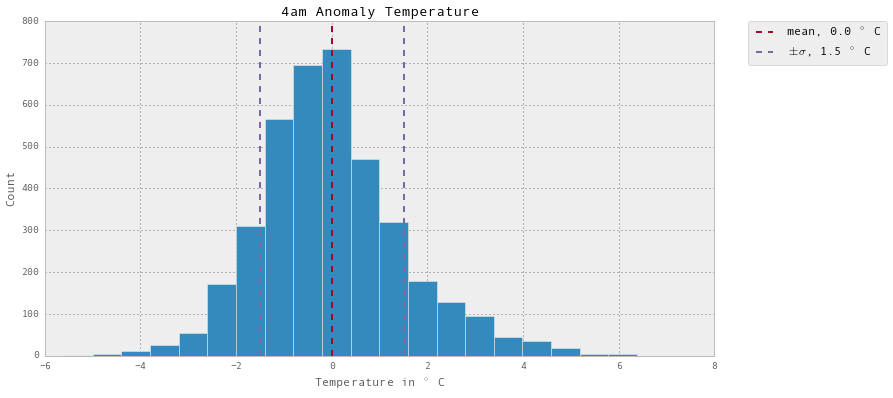

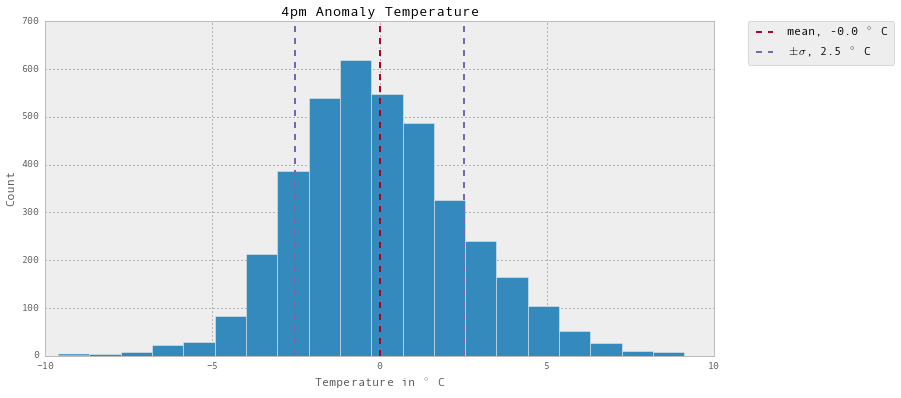

In [15]:
ibuttonplots.histPlot(anomalyDF, 'All Anomaly Temperature')
h1, bins1 = ibuttonplots.histPlot(anomalyDF[anomalyDF.index.hour == 4], '4am Anomaly Temperature')
h2, bins2 = ibuttonplots.histPlot(anomalyDF[anomalyDF.index.hour == 16], '4pm Anomaly Temperature')

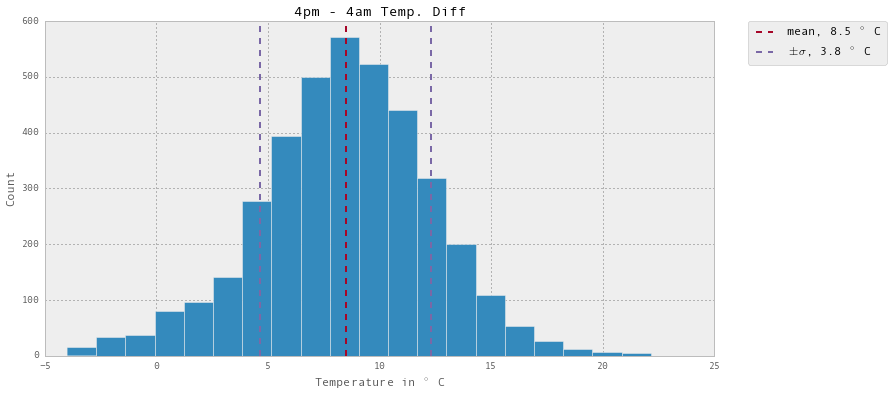

In [17]:
fig  = plt.figure(figsize=(12, 6))
diff = tempDF[tempDF.index.hour == 16].values - tempDF[tempDF.index.hour == 4].values
data = diff[~np.isnan(diff)]
n, bins, patches = plt.hist(data, 20)

plt.axvline(data.mean(),
                linestyle='dashed',
                color = pd.tools.plotting._get_standard_colors(3)[2],
                linewidth=2,
                label = 'mean, %2.1f $^\circ$ C'%np.nanmean(data),
                alpha = 1.0)

plt.axvline(data.std()+data.mean(),
                color = pd.tools.plotting._get_standard_colors(3)[1],
                linestyle='dashed',
                linewidth=2,
                label = '$\pm \sigma$, %2.1f $^\circ$ C'%np.nanstd(data)
                )

plt.axvline(data.mean()-data.std(),
                color = pd.tools.plotting._get_standard_colors(3)[1],
                linestyle='dashed',
                linewidth=2,
                )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #, ncol = 3)

plt.title('4pm - 4am Temp. Diff')
plt.xlabel('Temperature in $^\circ$ C')
plt.ylabel('Count')

(array([ 1.,  2.,  0.,  1.,  0.,  0.,  3.,  1.,  1.,  2.,  1.,  3.,  0.,
         3.,  1.,  2.,  5.,  2.,  2.,  4.]),
 array([ 24.625 ,  25.2817,  25.9384,  26.5951,  27.2518,  27.9085,
         28.5652,  29.2219,  29.8786,  30.5353,  31.192 ,  31.8487,
         32.5054,  33.1621,  33.8188,  34.4755,  35.1322,  35.7889,
         36.4456,  37.1023,  37.759 ]))

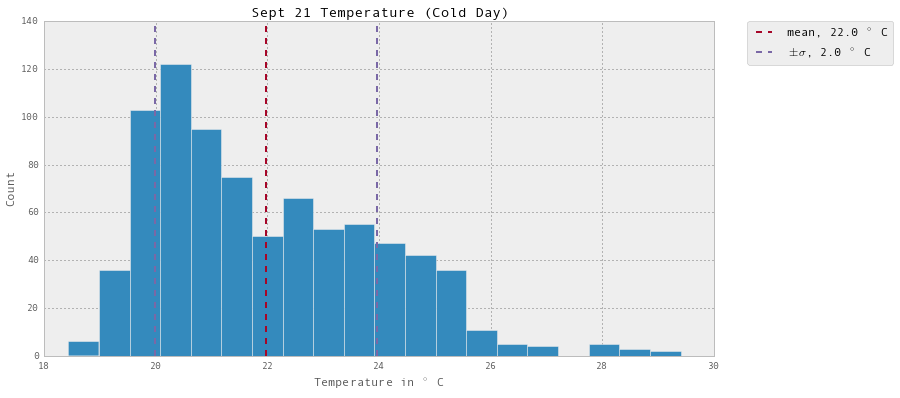

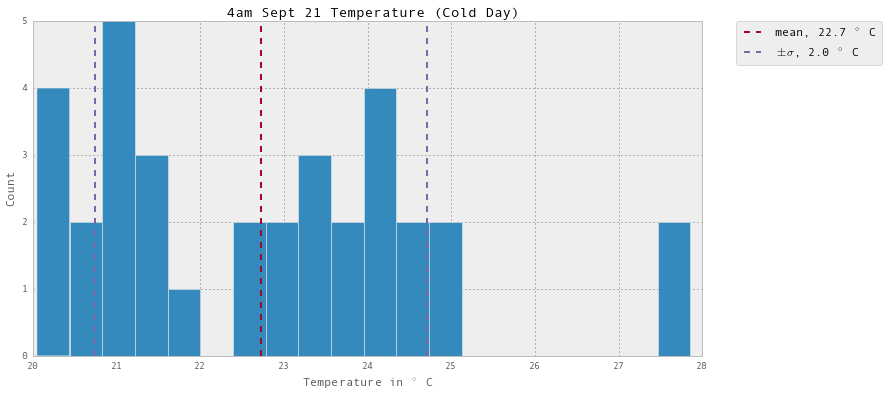

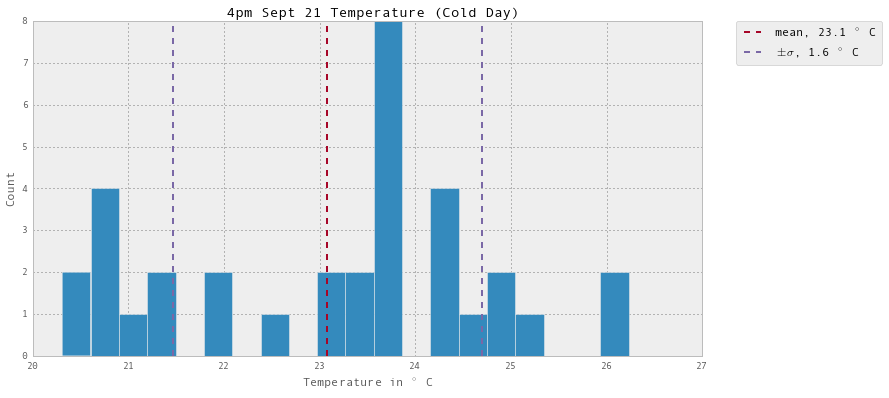

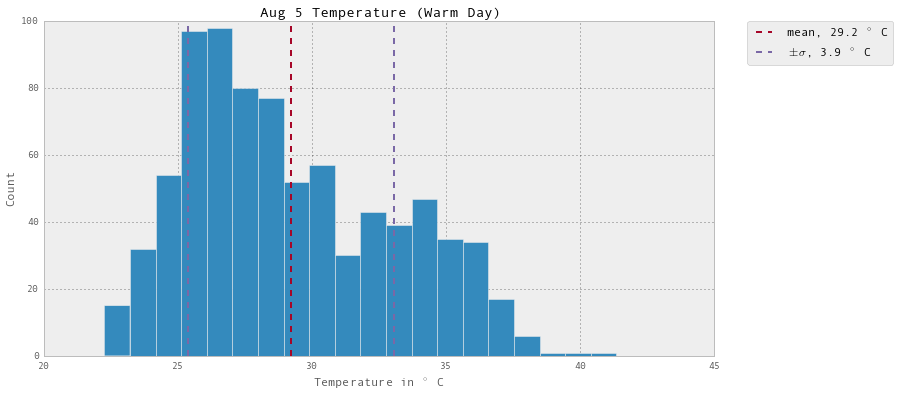

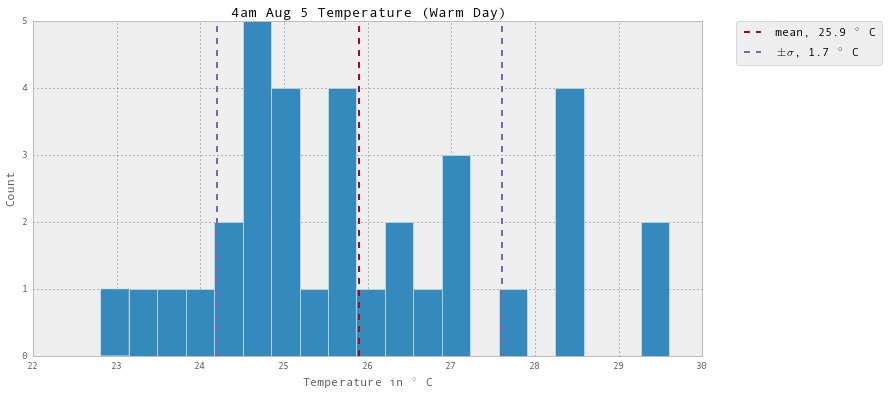

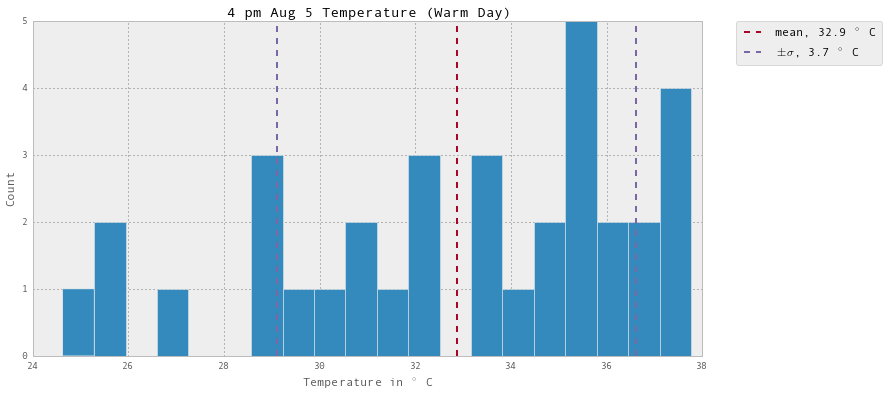

In [18]:
ibuttonplots.histPlot(tempDF['2015-09-21'], 'Sept 21 Temperature (Cold Day)')
ibuttonplots.histPlot(tempDF['2015-09-21 04:00:00'], ' 4am Sept 21 Temperature (Cold Day)')
ibuttonplots.histPlot(tempDF['2015-09-21 16:00:00'], ' 4pm Sept 21 Temperature (Cold Day)')

ibuttonplots.histPlot(tempDF['2015-08-05'], 'Aug 5 Temperature (Warm Day)')
ibuttonplots.histPlot(tempDF['2015-08-05 04:00:00'], '4am Aug 5 Temperature (Warm Day)')
ibuttonplots.histPlot(tempDF['2015-08-05 16:00:00'], '4 pm Aug 5 Temperature (Warm Day)')

In [40]:
reload(ibuttonplots)

<module 'ibuttonplots' from '../Bmore/ibuttonplots.py'>

skipping plot Temperature by Shadiness


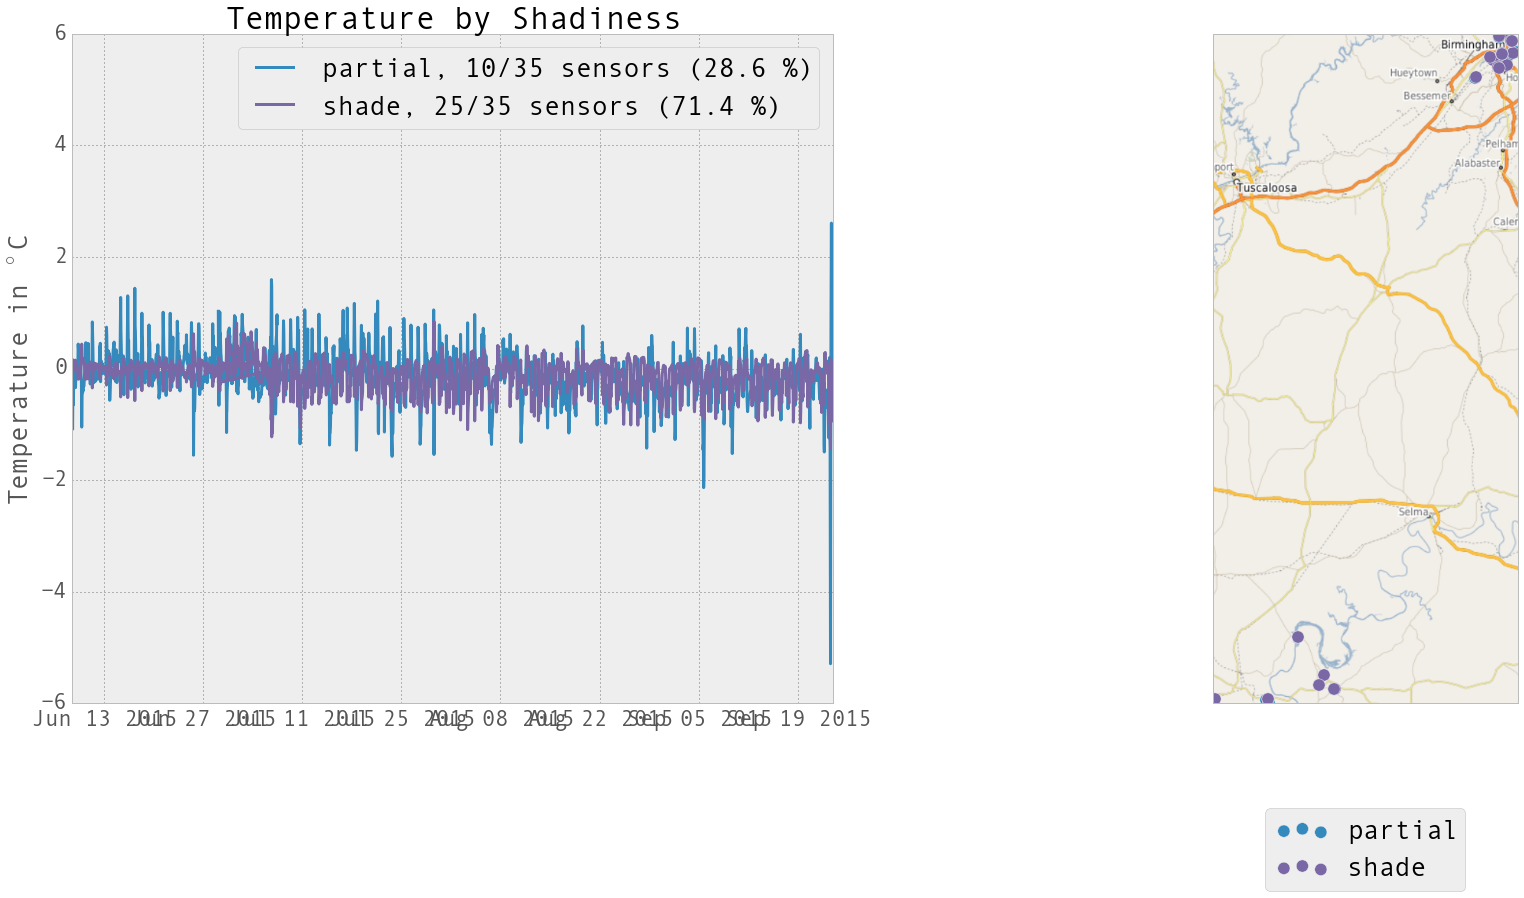

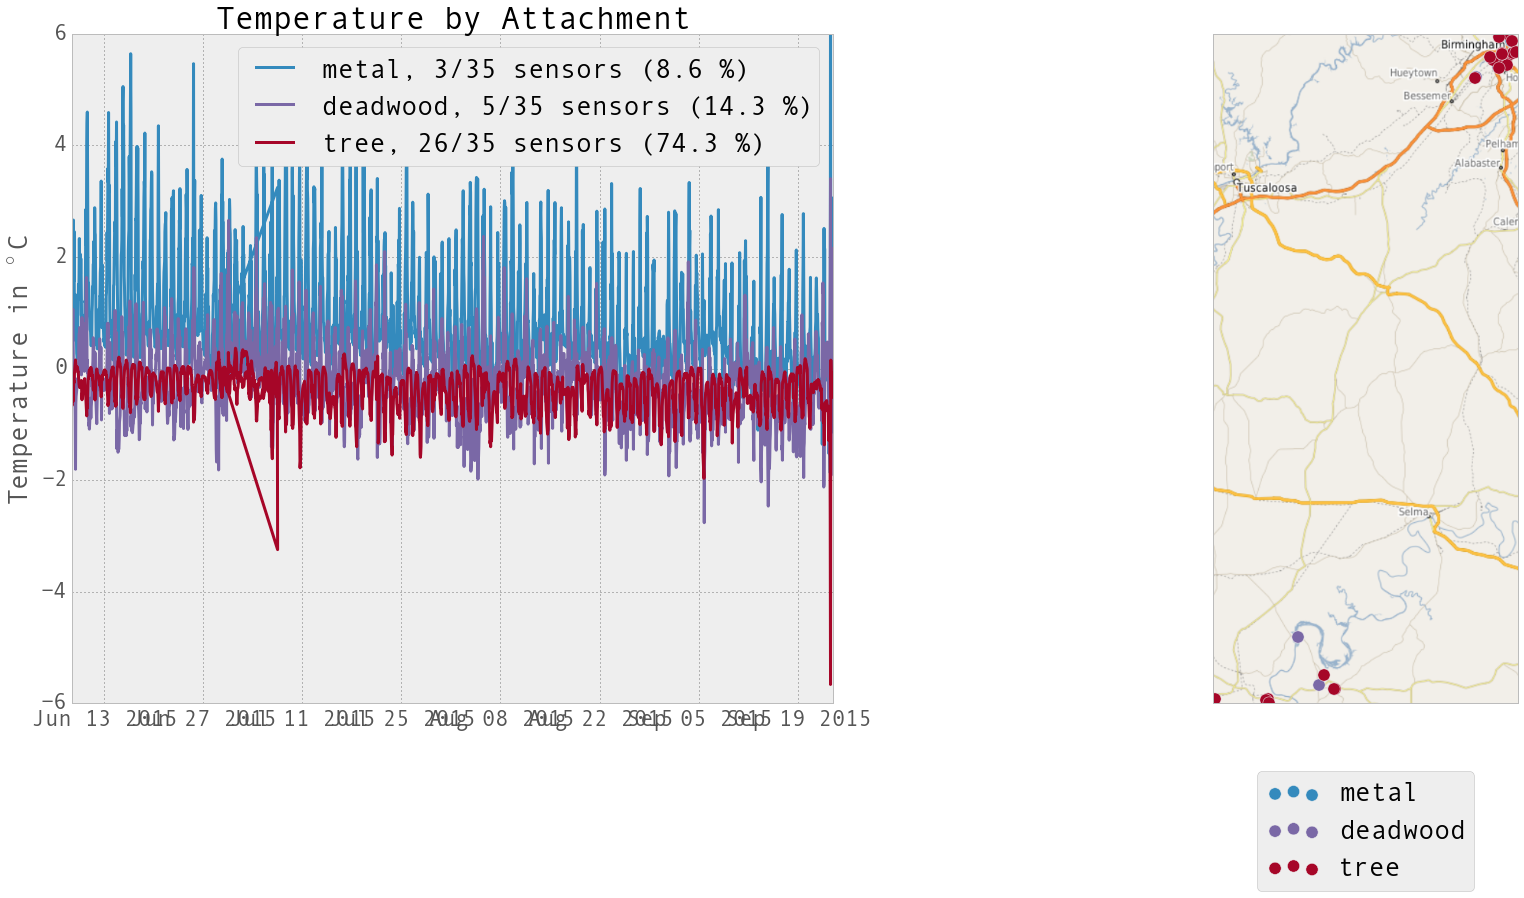

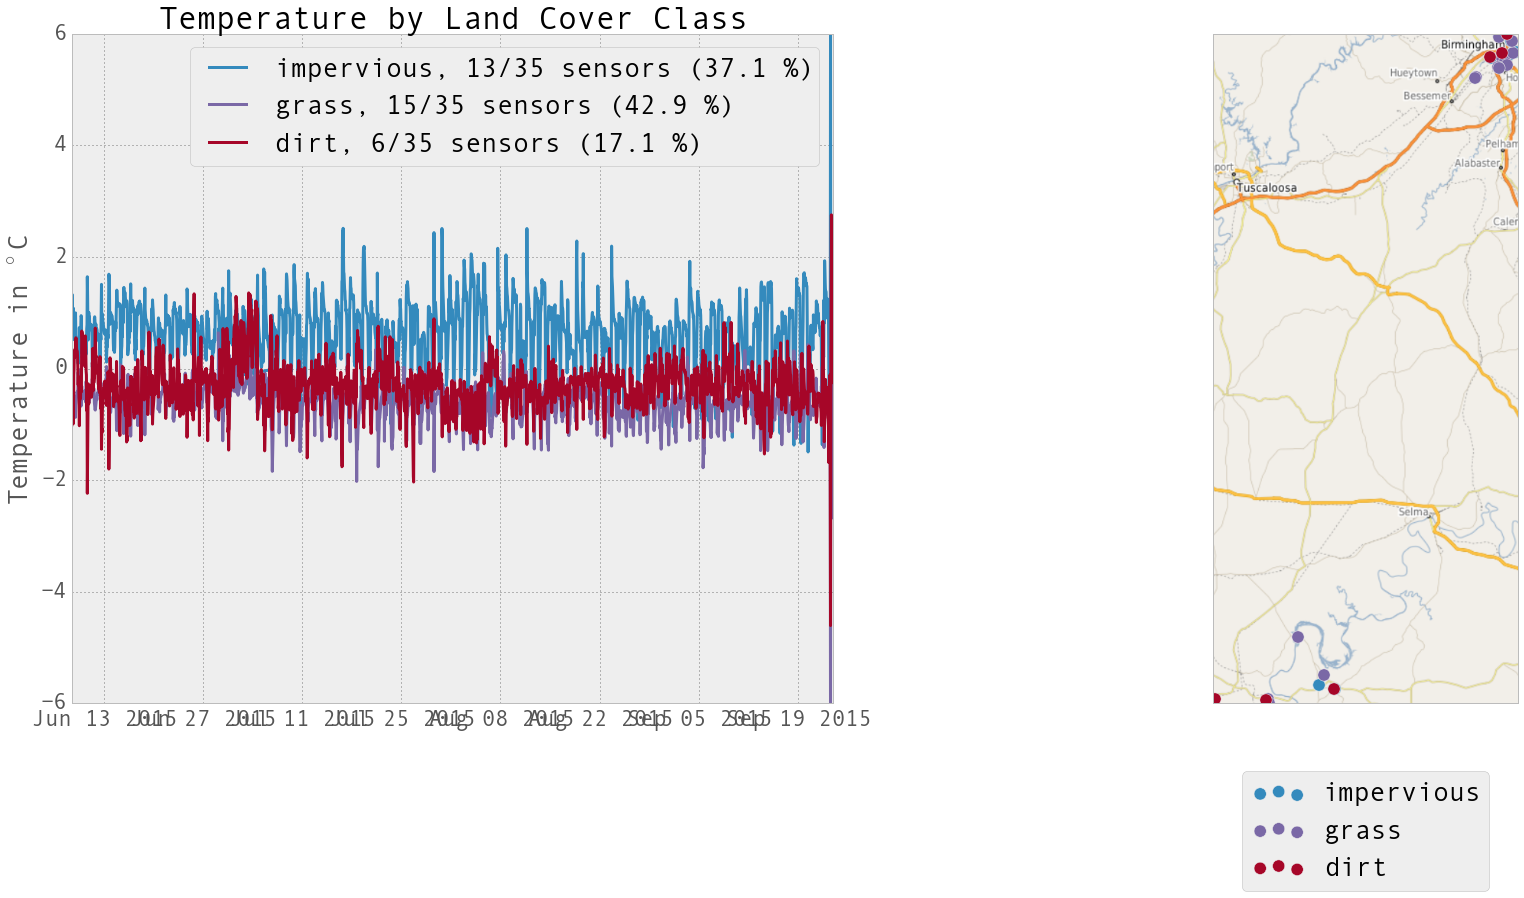

skipping plot Temperature by Shadiness for metal
skipping plot Temperature by Shadiness for metal


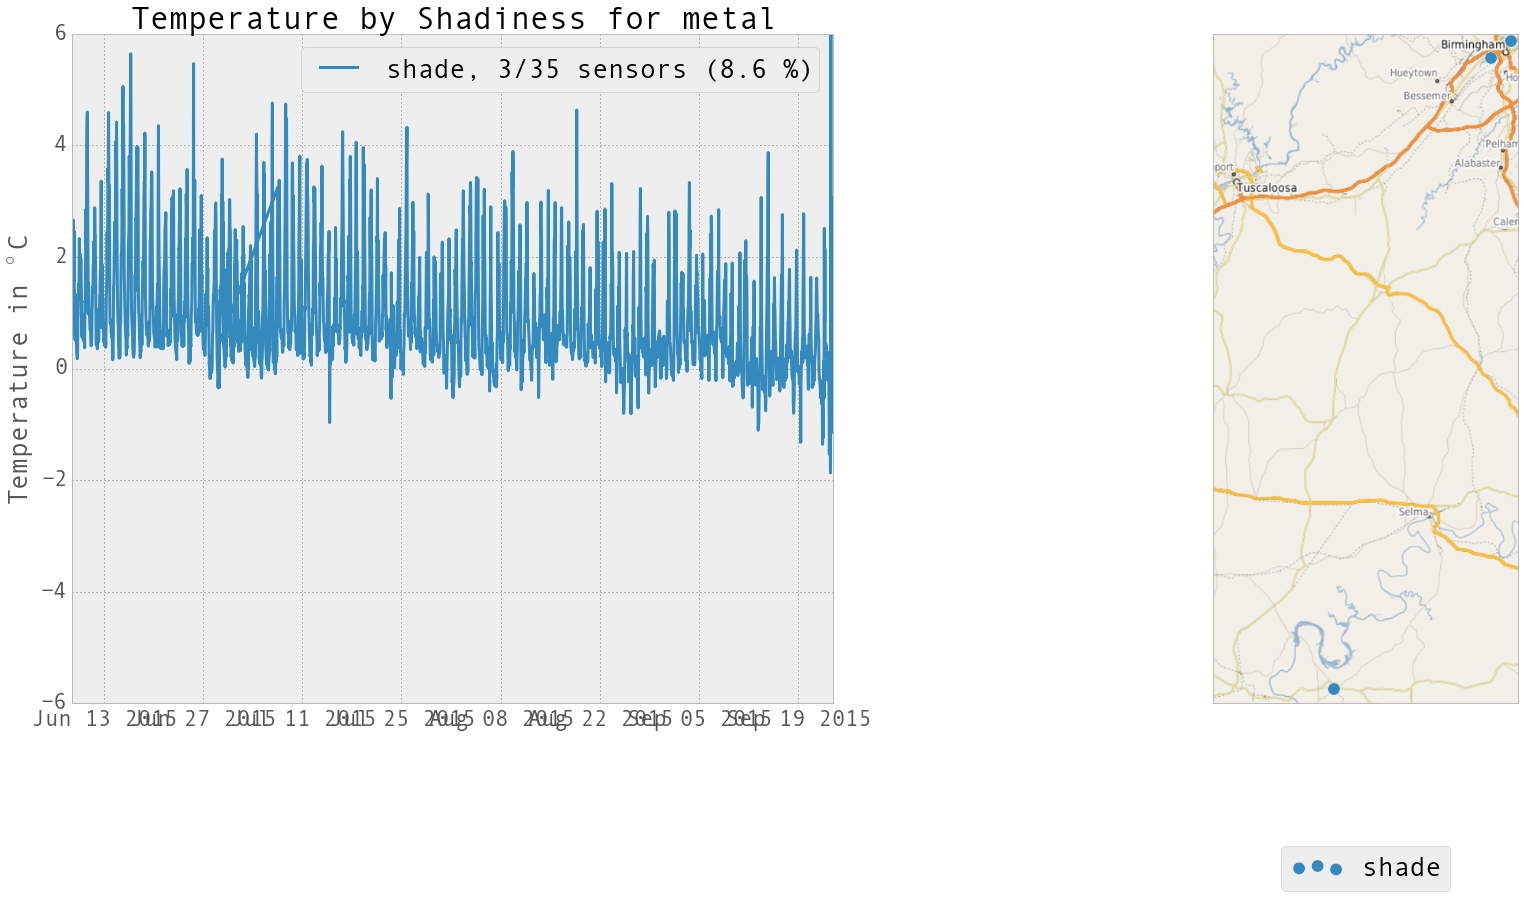

In [27]:
for option in {'landcoverclass', 'sunorshade', 'attachment'} : 
    ibuttonplots.timeseriesplots(anomalyDF,meta,option)
    #plt.savefig('diurnal%s.eps'%option, format = 'eps', dpi = 600)
ibuttonplots.timeseriesplots(anomalyDF, meta,'sunorshade', 'attachment', 'metal')

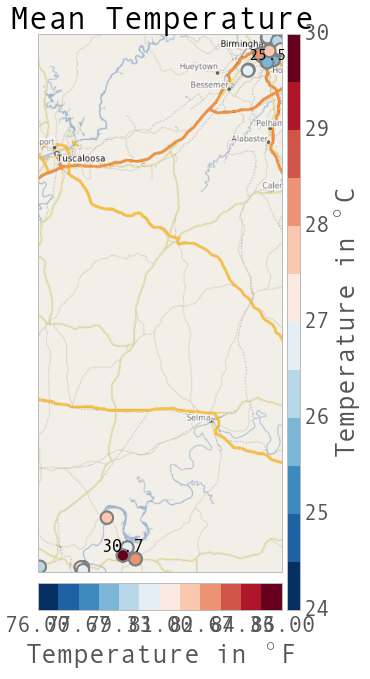

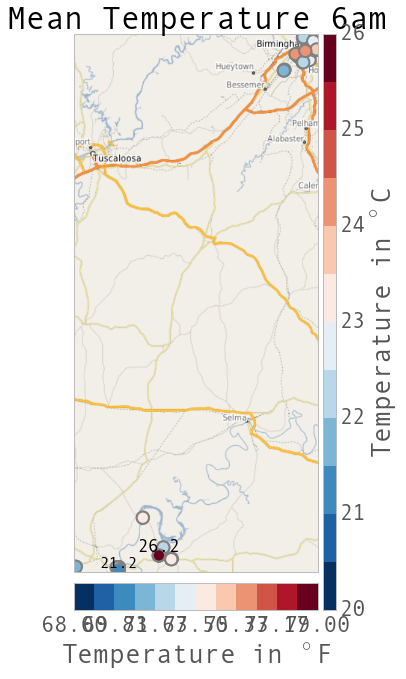

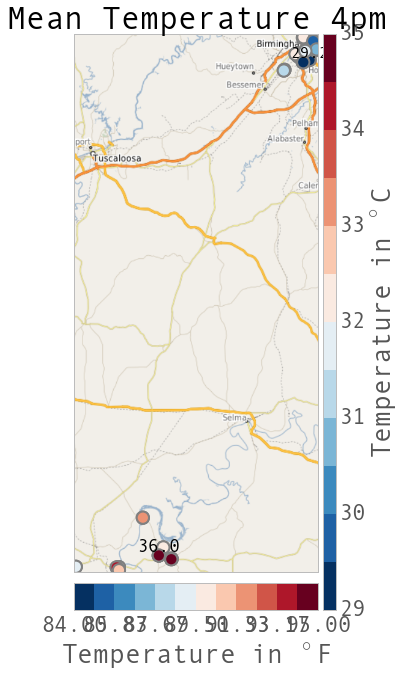

In [34]:
ibuttonplots.mapmean(tempDF[meta.index], meta)
ibuttonplots.mapmean(tempDF[meta.index][tempDF.index.hour == 6], meta, '6am')
ibuttonplots.mapmean(tempDF[meta.index][tempDF.index.hour == 16], meta, '4pm')

In [50]:
reload(ibuttonplots)

<module 'ibuttonplots' from '../Bmore/ibuttonplots.py'>

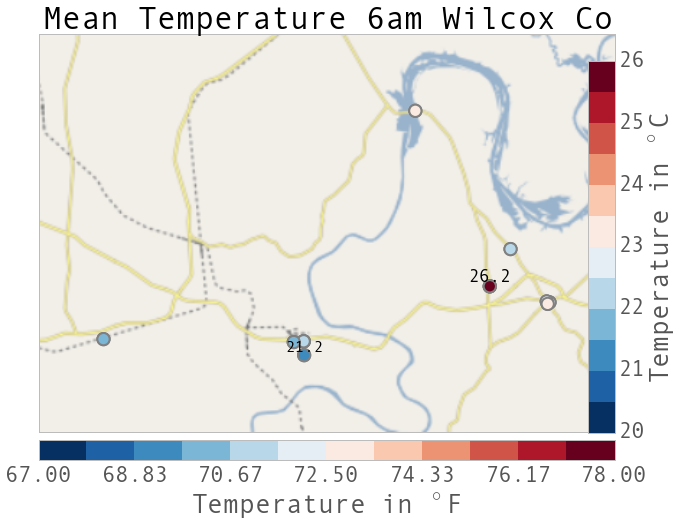

In [51]:
#ibuttonplots.mapmean(tempDF[BirminghamSensors][tempDF.index.hour == 6], meta.loc[BirminghamSensors], '6am Birmingham')
ibuttonplots.mapmean(tempDF[WilcoxSensors][tempDF.index.hour == 6], meta.loc[WilcoxSensors], '6am Wilcox Co')

skipping plot Diurnal Cycle by Shadiness


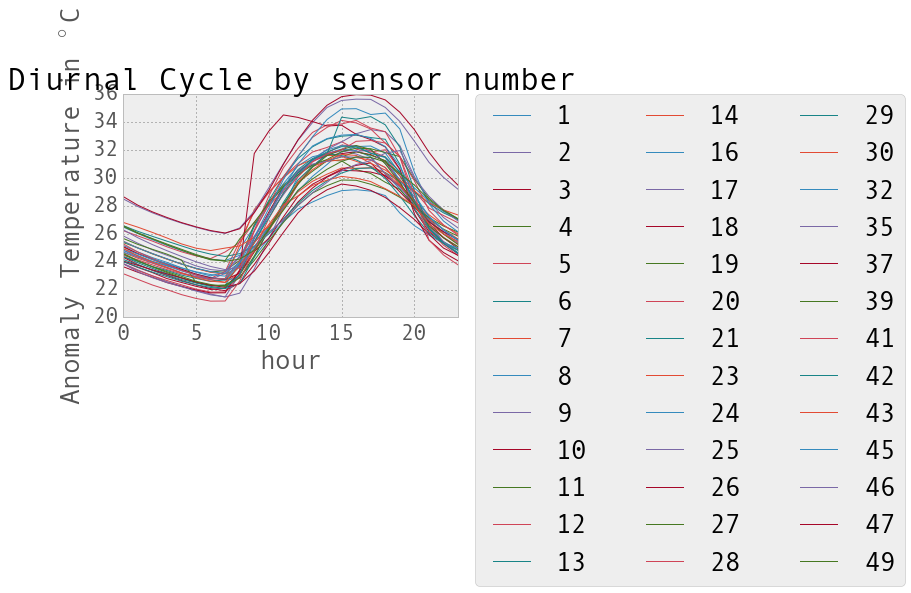

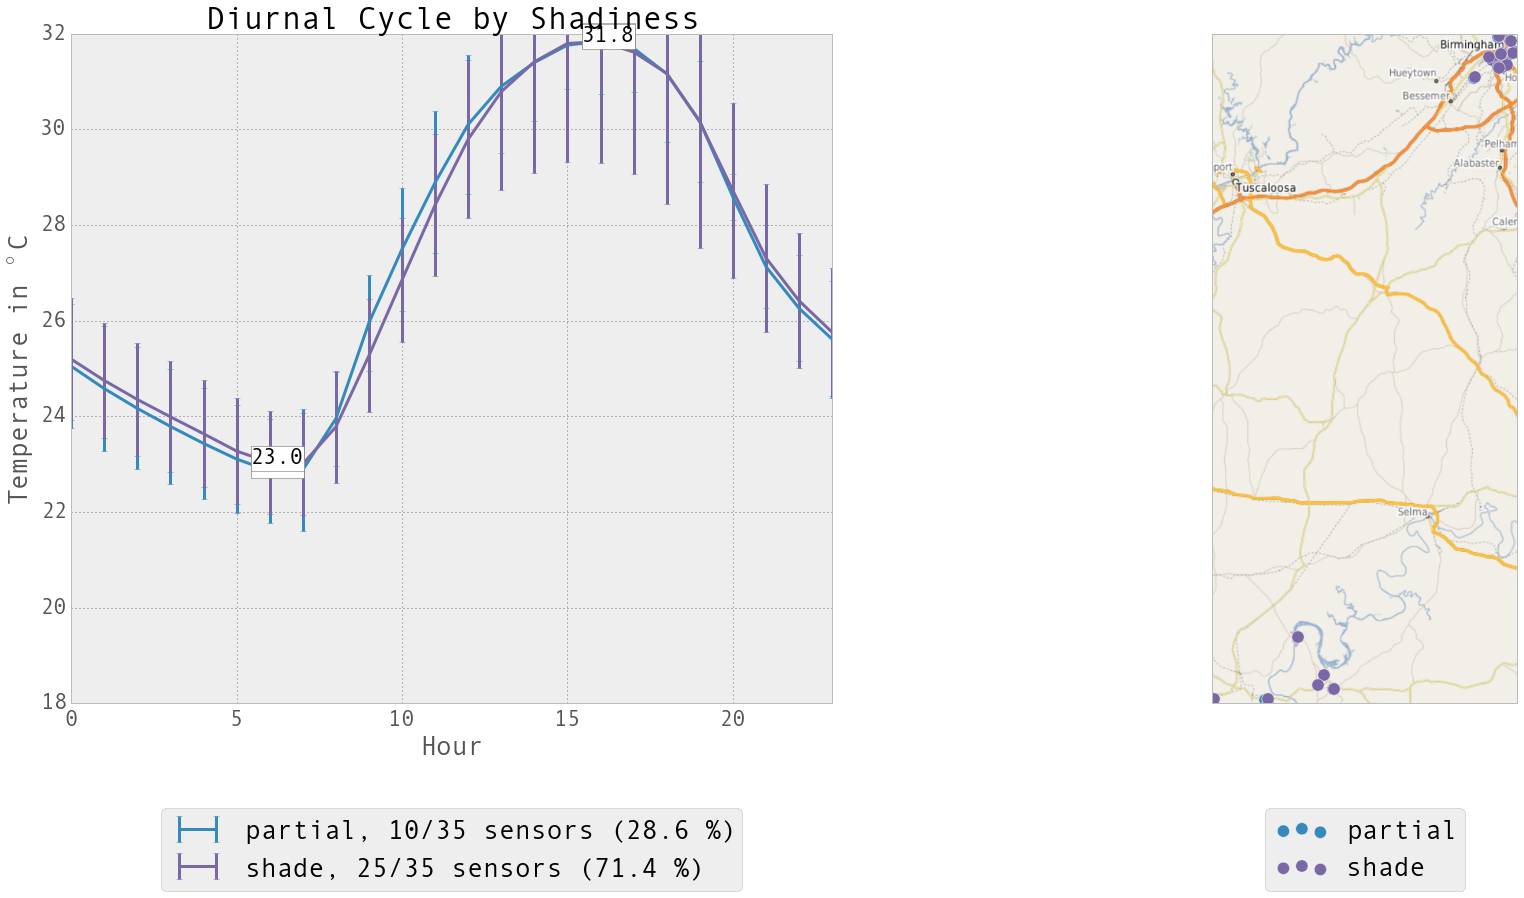

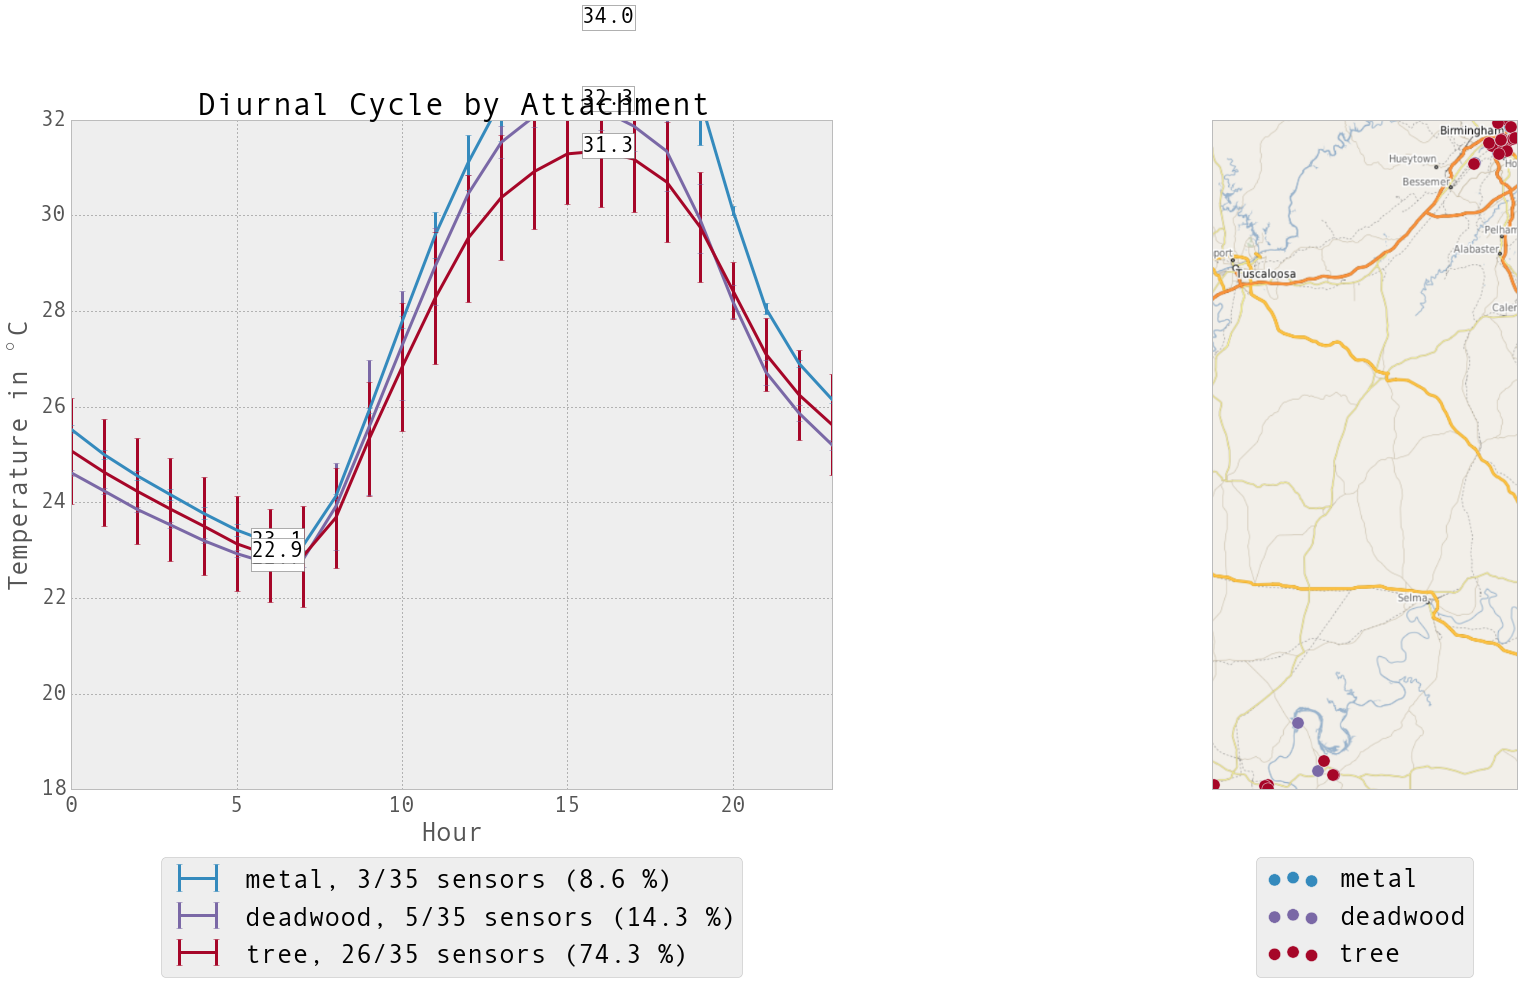

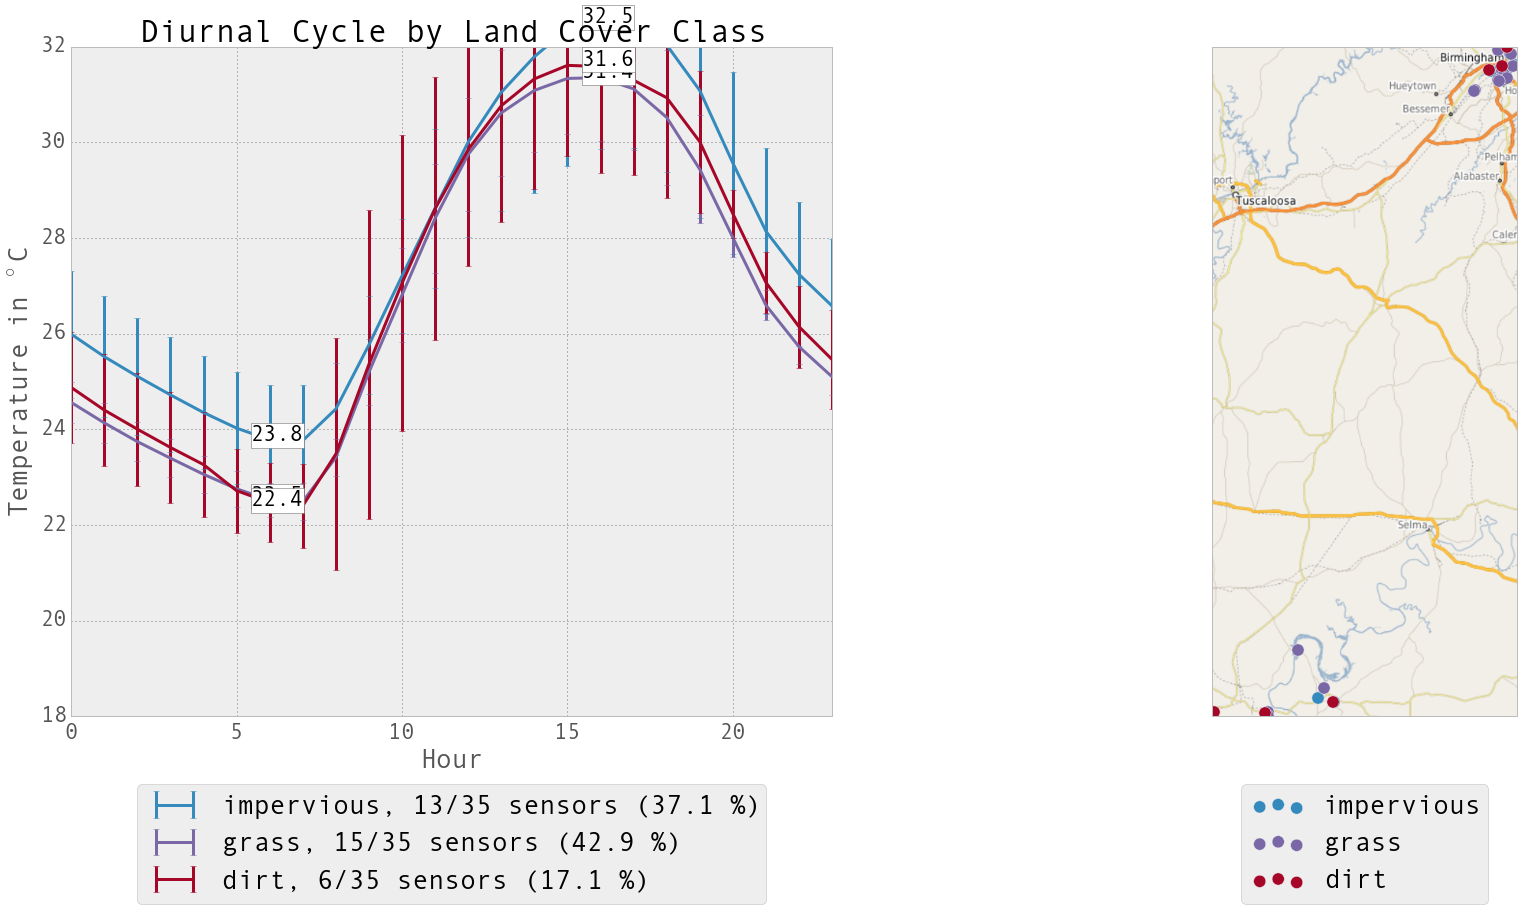

skipping plot Diurnal Cycle by Land Cover Class for sun
skipping plot Diurnal Cycle by Land Cover Class for sun
skipping plot Diurnal Cycle by Land Cover Class for sun


AttributeError: 'NoneType' object has no attribute 'get_window_extent'

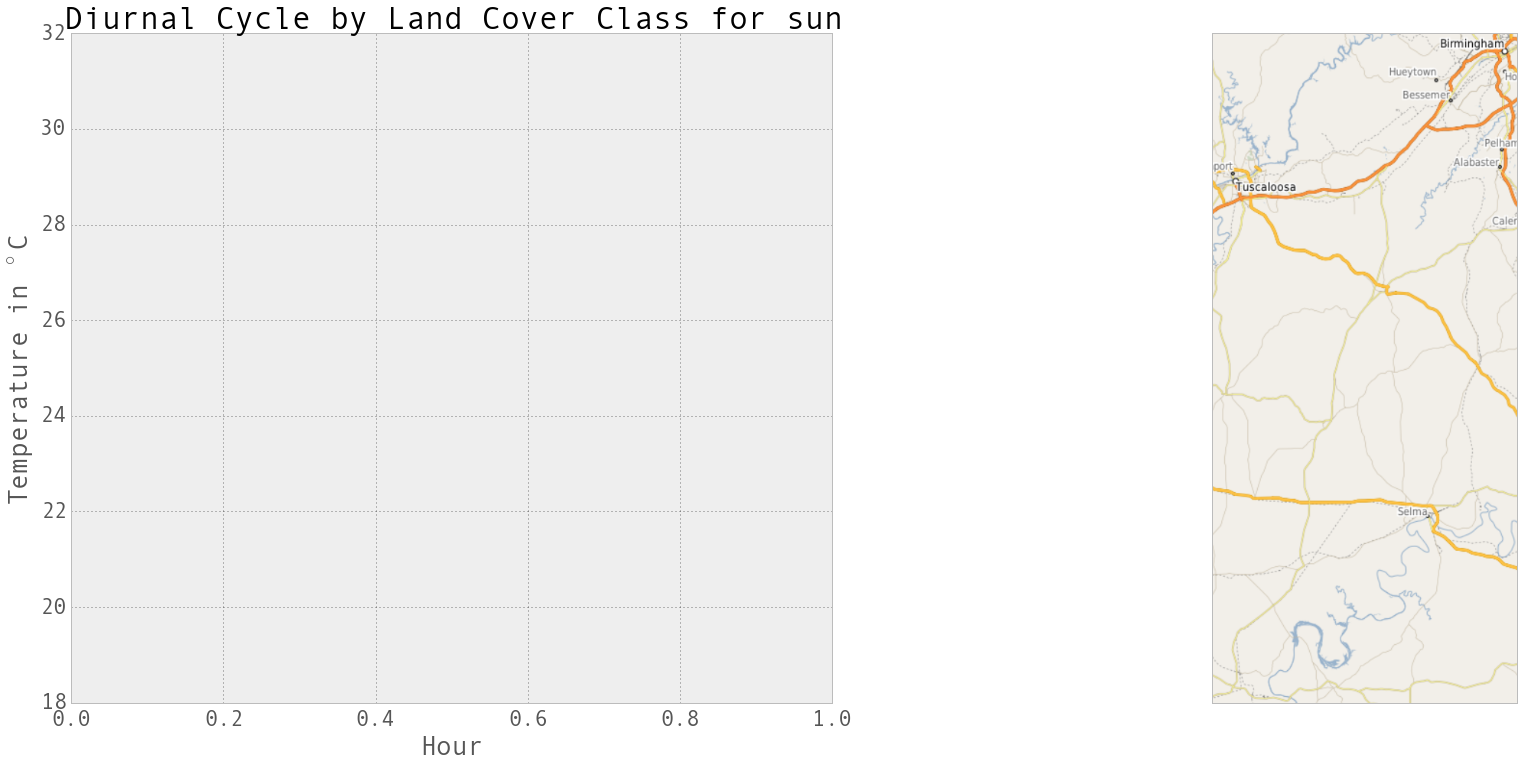

In [29]:
diurnalDF =  tempDF
diurnalDF["hour"] = tempDF.index.hour
diurnalDF.set_index("hour")
diurnalDF.groupby("hour").mean().plot()
plt.title('Diurnal Cycle by sensor number')
plt.ylabel('Anomaly Temperature in $^\circ $C')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)

for option in {'landcoverclass', 'sunorshade', 'attachment'} : 
    ibuttonplots.diurnalplots(diurnalDF,meta, option)
for option2 in {'shade', 'partial', 'sun'} : 
    ibuttonplots.diurnalplots(diurnalDF,meta, 'landcoverclass', 'sunorshade', option2)

In [37]:
Birmingham = np.where(meta['location:Latitude'] > 33)
Wilcox = np.where(meta['location:Latitude'] < 33)
BirminghamSensors = meta['sensornumber'].values[Birmingham]
WilcoxSensors = meta['sensornumber'].values[Wilcox]

In [43]:
reload(ibuttonplots)

<module 'ibuttonplots' from '../Bmore/ibuttonplots.py'>

skipping plot Diurnal Cycle by Shadiness


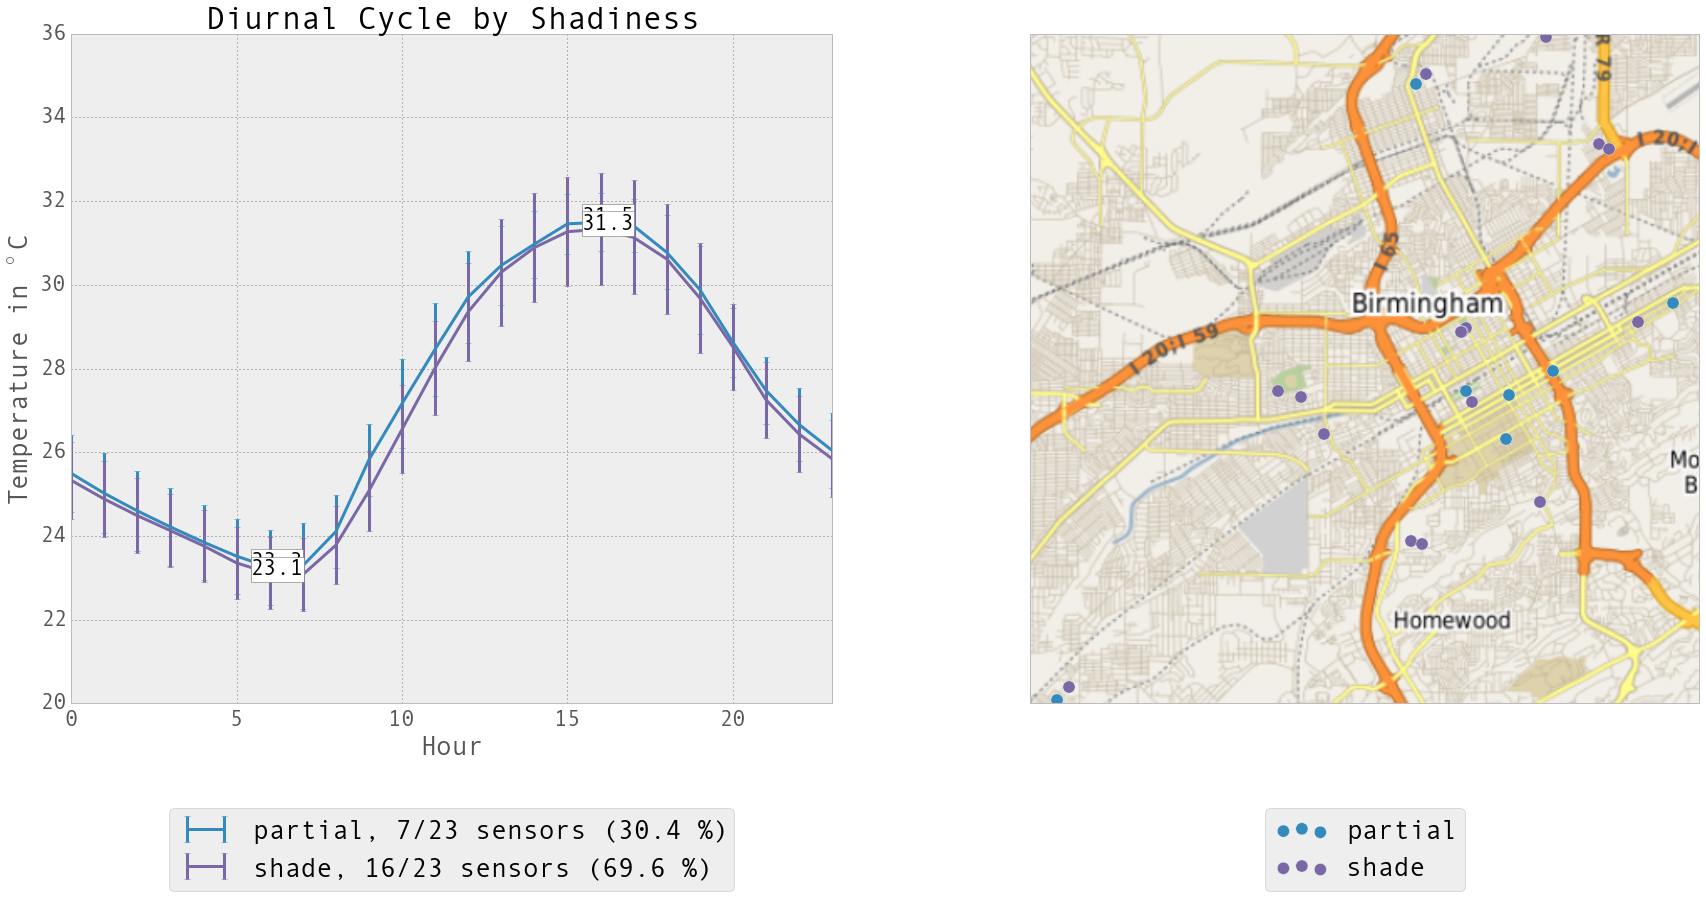

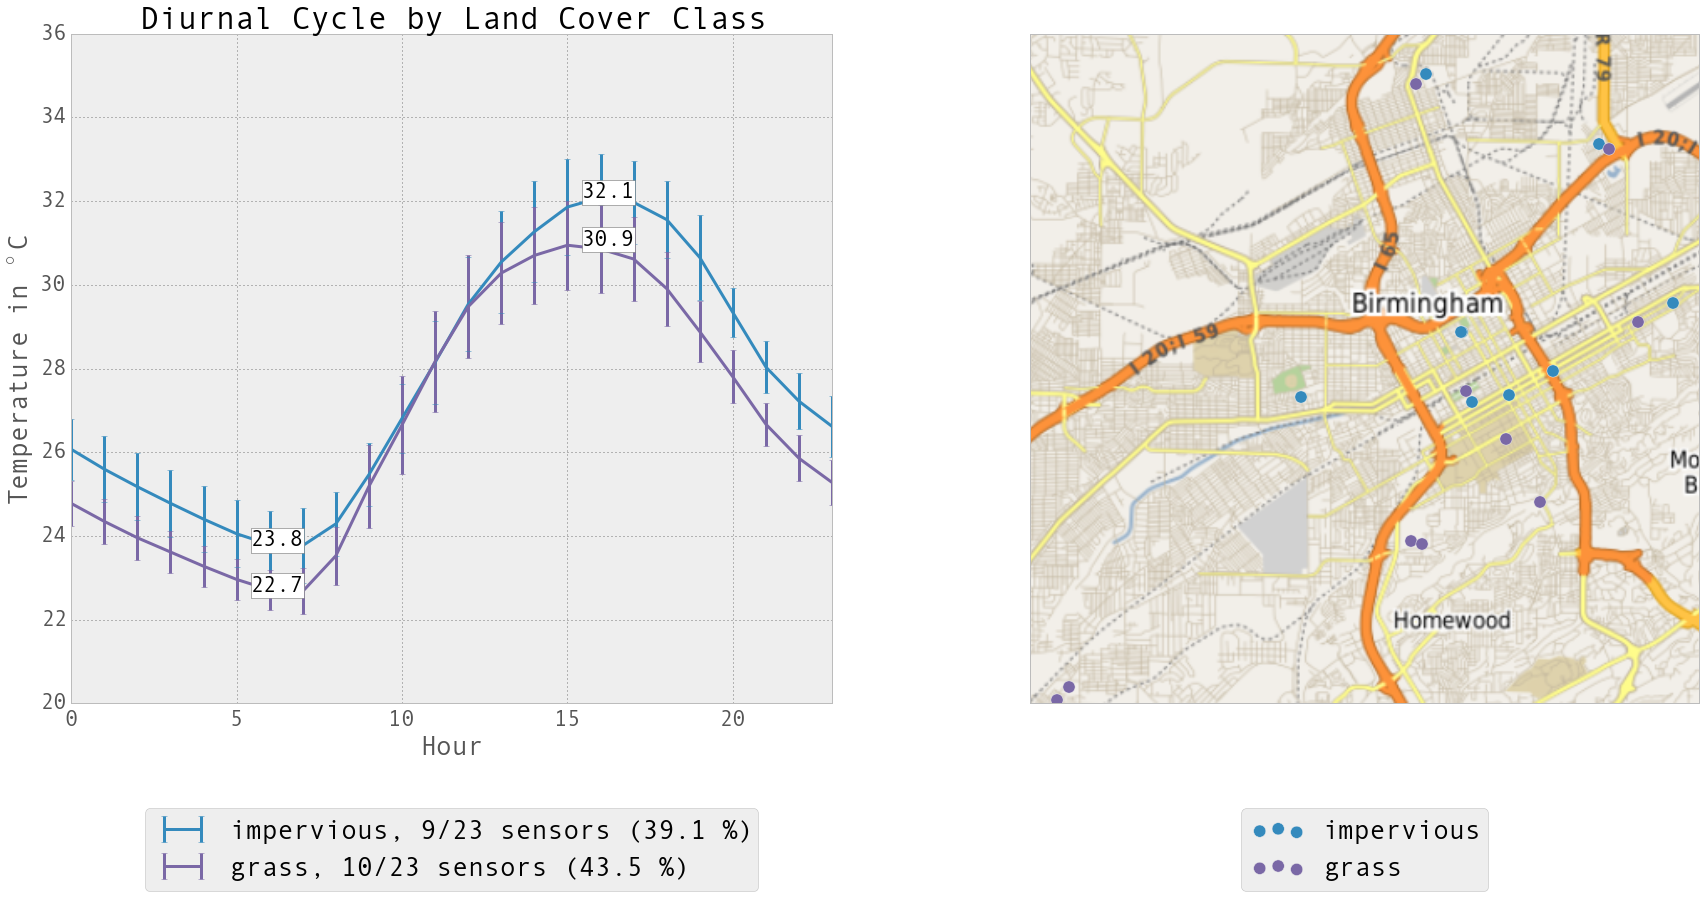

In [44]:
diurnalDF =  tempDF[BirminghamSensors]
diurnalDF["hour"] = tempDF.index.hour
diurnalDF.set_index("hour")

for option in {'landcoverclass', 'sunorshade'} : 
    ibuttonplots.diurnalplots(diurnalDF,meta.loc[BirminghamSensors], option)

skipping plot Diurnal Cycle by Shadiness


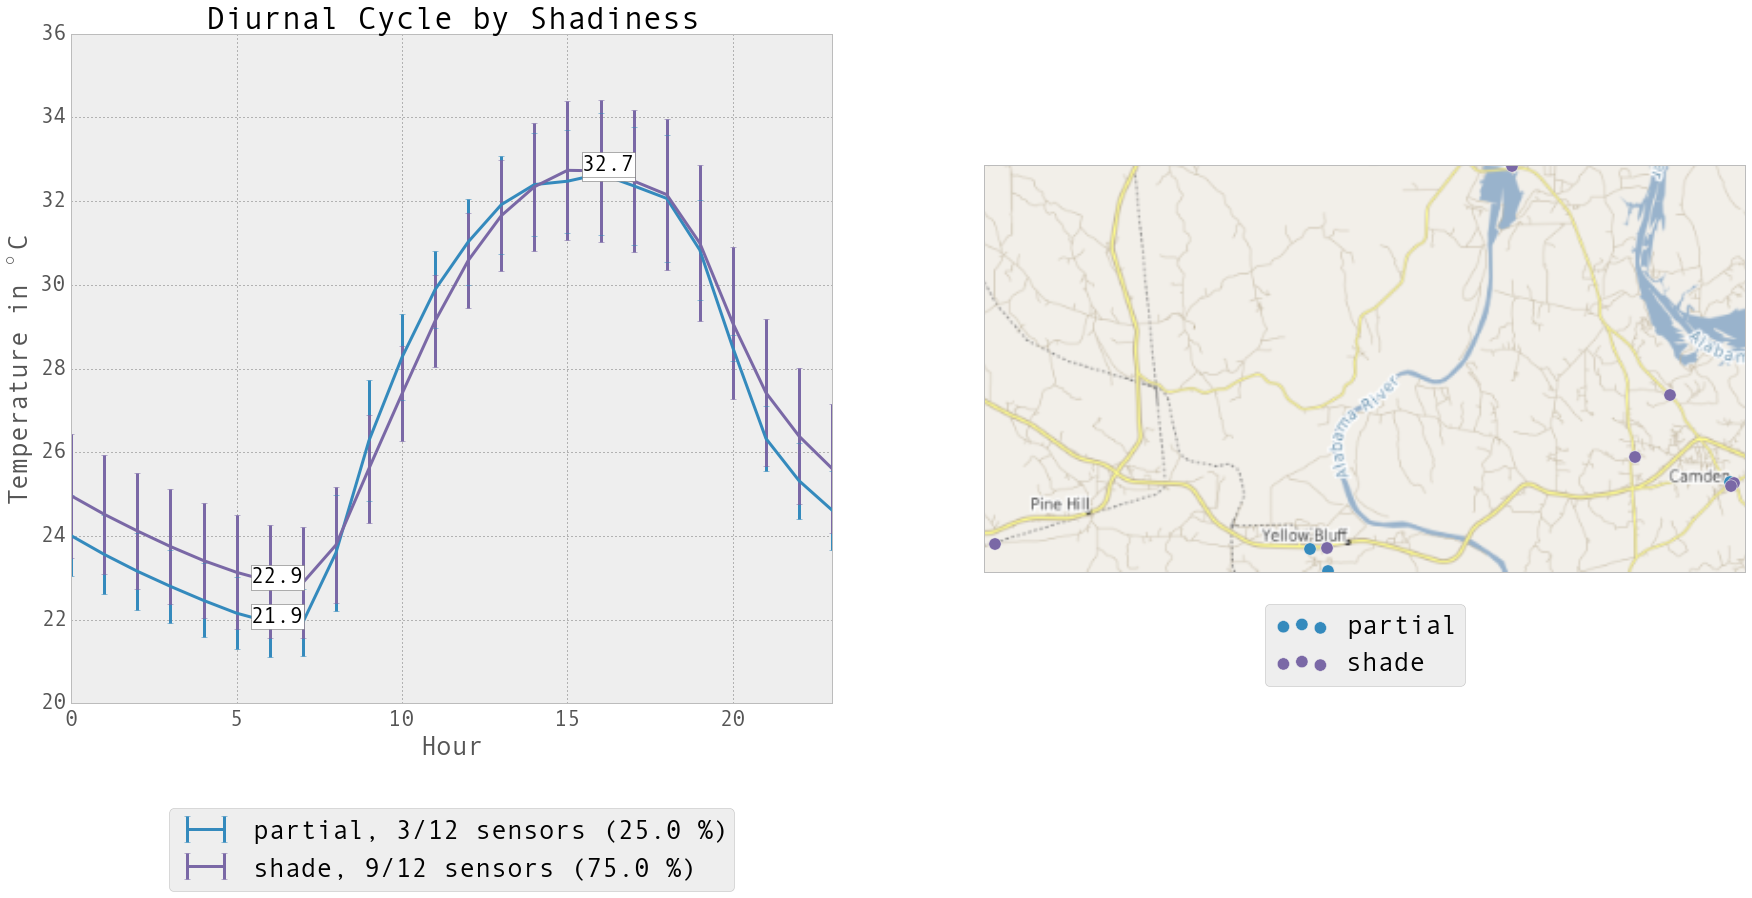

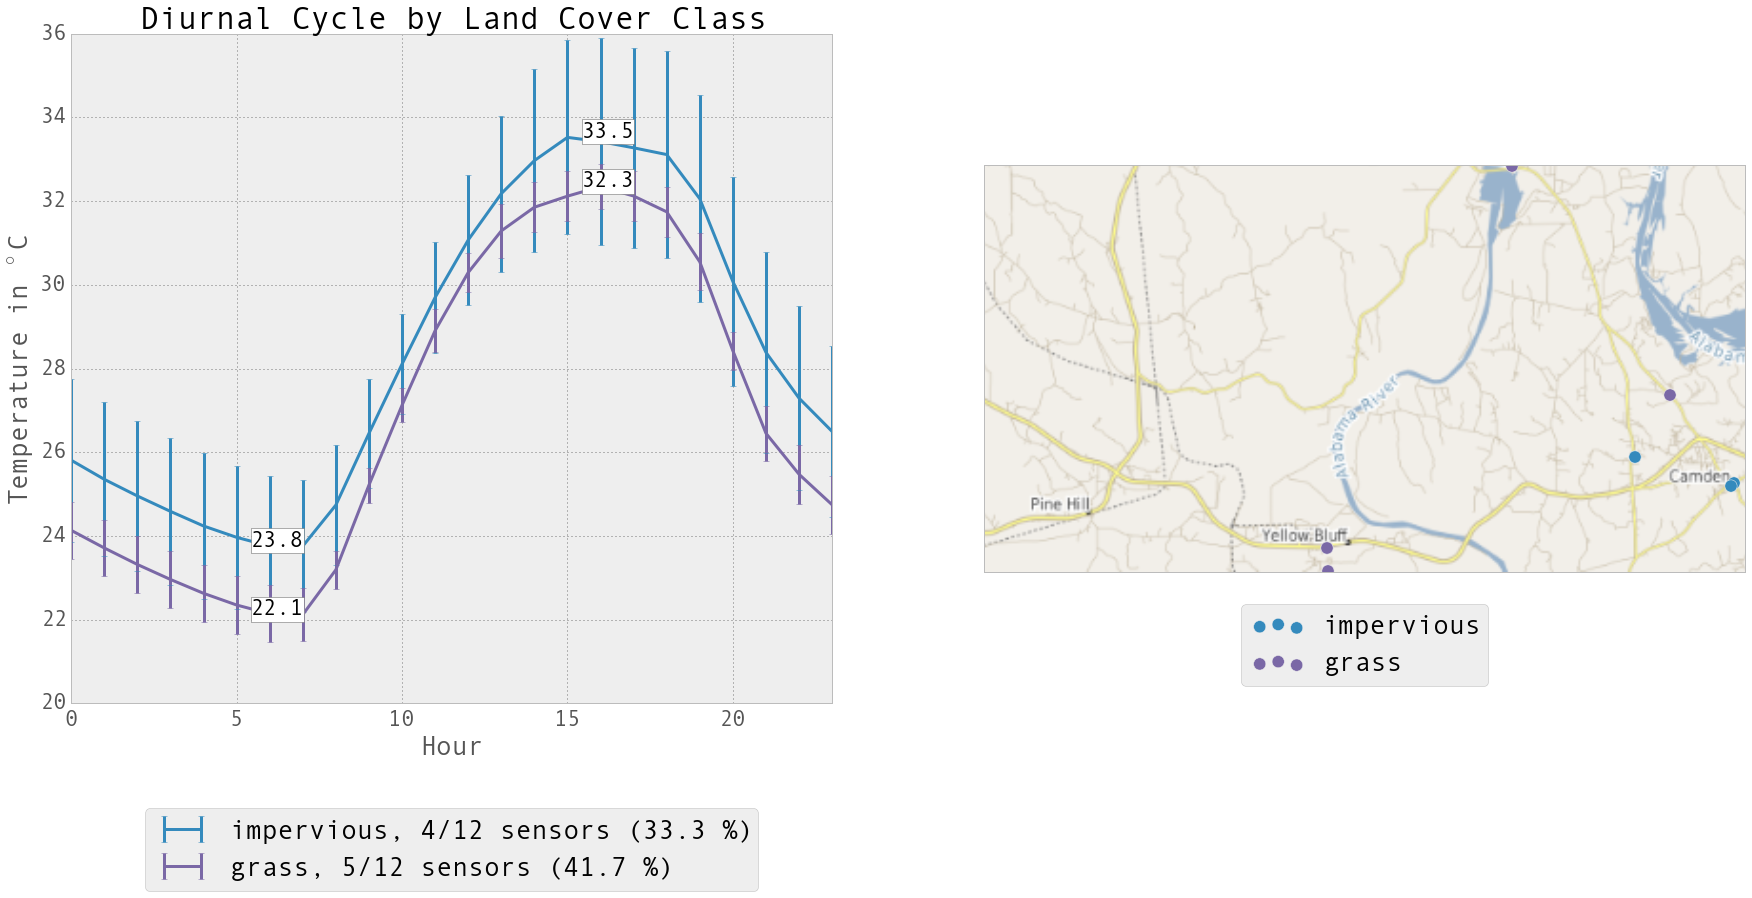

In [45]:
diurnalDF =  tempDF[WilcoxSensors]
diurnalDF["hour"] = tempDF.index.hour
diurnalDF.set_index("hour")

for option in {'landcoverclass', 'sunorshade'} : 
    ibuttonplots.diurnalplots(diurnalDF,meta.loc[WilcoxSensors], option)